In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\Christian\\git\\drone_steering\\models\\playground'

In [3]:
os.chdir('../..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer

In [5]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01_per_frame.csv
1,features_flip_c_02_120.csv,labels_flip_c_02_per_frame.csv
2,features_flip_c_03_120.csv,labels_flip_c_03_per_frame.csv
3,features_flip_l_01_120.csv,labels_flip_l_01_per_frame.csv
4,features_flip_l_02_120.csv,labels_flip_l_02_per_frame.csv
5,features_flip_p_01_120.csv,labels_flip_p_01_per_frame.csv
6,features_land_c_01_120.csv,labels_land_c_01_per_frame.csv
7,features_land_c_02_120.csv,labels_land_c_02_per_frame.csv
8,features_land_c_03_120.csv,labels_land_c_03_per_frame.csv
9,features_land_l_01_120.csv,labels_land_l_01_per_frame.csv


In [6]:
de.load_data()
de.assemble_data(max_error=500, tolerance_range= 600)
de.display_information()

i: 0 	shape X: (537, 17, 16) 	shape y: (537,) 	count: 55
i: 1 	shape X: (520, 17, 16) 	shape y: (520,) 	count: 37
i: 2 	shape X: (499, 17, 16) 	shape y: (499,) 	count: 59
i: 3 	shape X: (557, 17, 16) 	shape y: (557,) 	count: 135
i: 4 	shape X: (509, 17, 16) 	shape y: (509,) 	count: 95
i: 5 	shape X: (532, 17, 16) 	shape y: (532,) 	count: 88
i: 6 	shape X: (441, 17, 16) 	shape y: (441,) 	count: 83
i: 7 	shape X: (491, 17, 16) 	shape y: (491,) 	count: 70
i: 8 	shape X: (477, 17, 16) 	shape y: (477,) 	count: 74
i: 9 	shape X: (493, 17, 16) 	shape y: (493,) 	count: 112
i: 10 	shape X: (437, 17, 16) 	shape y: (437,) 	count: 63
i: 11 	shape X: (467, 17, 16) 	shape y: (467,) 	count: 86
i: 12 	shape X: (649, 17, 16) 	shape y: (649,) 	count: 57
i: 13 	shape X: (588, 17, 16) 	shape y: (588,) 	count: 150
i: 14 	shape X: (565, 17, 16) 	shape y: (565,) 	count: 115
i: 15 	shape X: (541, 17, 16) 	shape y: (541,) 	count: 0
i: 16 	shape X: (470, 17, 16) 	shape y: (470,) 	count: 77
i: 17 	shape X: (525,

In [7]:
from keras.utils import to_categorical

X = de.X.copy()
y = de.y.copy()

print("---------------------------------------------------------------------")
print("Shapes before removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

# only select certain indices to prevent too many 0-labeled instances
idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels before removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")
    
zero_idx = np.random.choice(idx[0], 500, replace=False)
keep_idx = np.concatenate([zero_idx,idx[1],idx[2],idx[3],idx[4],idx[5],idx[6]])
keep_idx = sorted(keep_idx)

print("---------------------------------------------------------------------")
y = y[keep_idx]
X = X[keep_idx]
print("Shapes after removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels after removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")    
    
# print("---------------------------------------------------------------------")
# print("Features:")
# print(de.LabelGenerators[0].feature_names)


print("---------------------------------------------------------------------")
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(X)

y = to_categorical(y)

print("Shapes after transformation:") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))

---------------------------------------------------------------------
Shapes before removal of 'no movements':
y: (10350,)
X: (10350, 17, 16)

Labels before removal of 'no movements'
0 8732
1 242
2 322
3 469
4 0
5 97
6 488

---------------------------------------------------------------------
Shapes after removal of 'no movements':
y: (2118,)
X: (2118, 17, 16)

Labels after removal of 'no movements'
0 500
1 242
2 322
3 469
4 0
5 97
6 488

---------------------------------------------------------------------
Shapes after transformation:
y: (2118, 7)
X: (2118, 17, 16)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [12]:
n_timesteps = X.shape[1] # here 17
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(        
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=16, 
    verbose=1
)

Epoch 1/50
1694/1694 [==============================] - 3s 2ms/step - loss: 1.1489 - acc: 0.5348
Epoch 2/50
1694/1694 [==============================] - 2s 1ms/step - loss: 0.6460 - acc: 0.7509
Epoch 3/50
1694/1694 [==============================] - 2s 1ms/step - loss: 0.5460 - acc: 0.7822
Epoch 4/50
1694/1694 [==============================] - 2s 1ms/step - loss: 0.5570 - acc: 0.7792
Epoch 5/50
1694/1694 [==============================] - 2s 1ms/step - loss: 0.5205 - acc: 0.7975
Epoch 6/50
1694/1694 [==============================] - 2s 1ms/step - loss: 0.4631 - acc: 0.8158
Epoch 7/50
1694/1694 [==============================] - 2s 1ms/step - loss: 0.4721 - acc: 0.8081
Epoch 8/50
1694/1694 [==============================] - 2s 1ms/step - loss: 0.4562 - acc: 0.8182
Epoch 9/50
1694/1694 [==============================] - 2s 1ms/step - loss: 0.4327 - acc: 0.8400
Epoch 10/50
1694/1694 [==============================] - 2s 1ms/step - loss: 0.4467 - acc: 0.8300
Epoch 11/50
1694/1694 [======

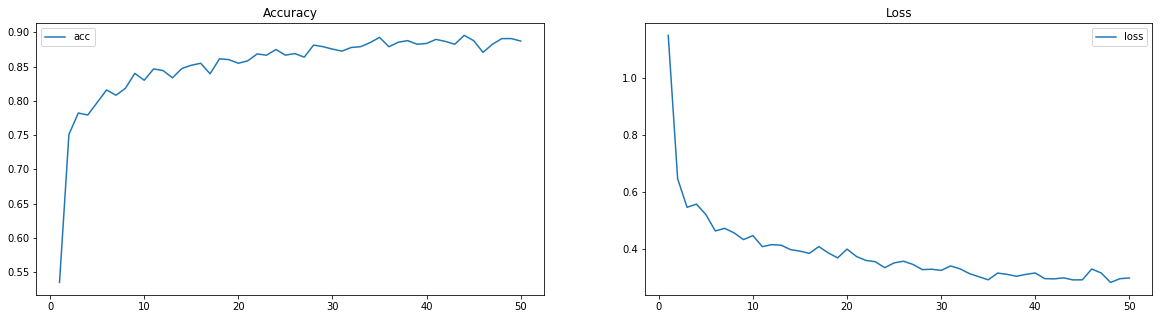

In [14]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [52]:
eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

424/424 [==============================] - 0s 344us/step
Loss:     0.33
Accuracy: 0.87


In [60]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 2 	Pred: 0 	Actual: 3 	Probability: 0.78
Index: 9 	Pred: 6 	Actual: 0 	Probability: 0.68
Index: 23 	Pred: 6 	Actual: 0 	Probability: 0.5
Index: 25 	Pred: 0 	Actual: 3 	Probability: 0.79
Index: 34 	Pred: 6 	Actual: 0 	Probability: 0.58
Index: 36 	Pred: 3 	Actual: 0 	Probability: 0.69
Index: 41 	Pred: 5 	Actual: 1 	Probability: 0.59
Index: 47 	Pred: 3 	Actual: 0 	Probability: 0.75
Index: 78 	Pred: 1 	Actual: 0 	Probability: 0.99
Index: 85 	Pred: 0 	Actual: 3 	Probability: 0.78
Index: 87 	Pred: 1 	Actual: 0 	Probability: 0.96
Index: 96 	Pred: 6 	Actual: 0 	Probability: 0.74
Index: 106 	Pred: 5 	Actual: 1 	Probability: 0.57
Index: 111 	Pred: 3 	Actual: 0 	Probability: 0.82
Index: 124 	Pred: 2 	Actual: 0 	Probability: 0.98
Index: 128 	Pred: 6 	Actual: 0 	Probability: 0.72
Index: 145 	Pred: 3 	Actual: 0 	Probability: 0.93
Index: 157 	Pred: 3 	Actual: 0 	Probability: 0.72
Index: 164 	Pred: 1 	Actual: 5 	Probability: 0.59
Index: 172 	Pred: 6 	Actual: 0 	Probability: 0.68
Index: 183 	Pre

In [58]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 1 	Pred: 3 	Actual: 3 	Probability: 0.96
Index: 3 	Pred: 5 	Actual: 5 	Probability: 0.73
Index: 4 	Pred: 2 	Actual: 2 	Probability: 0.92
Index: 5 	Pred: 3 	Actual: 3 	Probability: 0.89
Index: 6 	Pred: 0 	Actual: 0 	Probability: 0.51
Index: 7 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8 	Pred: 3 	Actual: 3 	Probability: 0.95
Index: 10 	Pred: 0 	Actual: 0 	Probability: 0.89
Index: 11 	Pred: 1 	Actual: 1 	Probability: 0.82
Index: 12 	Pred: 2 	Actual: 2 	Probability: 0.93
Index: 13 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 14 	Pred: 0 	Actual: 0 	Probability: 0.91
Index: 15 	Pred: 3 	Actual: 3 	Probability: 0.56
Index: 16 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 17 	Pred: 2 	Actual: 2 	Probability: 0.96
Index: 18 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 19 	Pred: 0 	Actual: 0 	Probability: 0.53
Index: 20 	Pred: 1 	Actual: 1 	Probability: 0.81
Index: 21 	Pred: 6 	Actual: 6 	Probability: 0.97
Index: 22 	Pred: 2 	Actual: 2

Index: 196 	Pred: 0 	Actual: 0 	Probability: 0.79
Index: 198 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 199 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 201 	Pred: 2 	Actual: 2 	Probability: 0.95
Index: 202 	Pred: 0 	Actual: 0 	Probability: 0.68
Index: 203 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 204 	Pred: 3 	Actual: 3 	Probability: 0.85
Index: 205 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 206 	Pred: 3 	Actual: 3 	Probability: 0.85
Index: 207 	Pred: 0 	Actual: 0 	Probability: 0.65
Index: 208 	Pred: 3 	Actual: 3 	Probability: 0.94
Index: 209 	Pred: 2 	Actual: 2 	Probability: 0.93
Index: 211 	Pred: 3 	Actual: 3 	Probability: 0.92
Index: 212 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 213 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 214 	Pred: 2 	Actual: 2 	Probability: 0.97
Index: 215 	Pred: 0 	Actual: 0 	Probability: 0.79
Index: 216 	Pred: 6 	Actual: 6 	Probability: 0.97
Index: 217 	Pred: 3 	Actual: 3 	Probability: 0.97
Index: 218 	Pred: 1 	Actual: 1 	Probability: 0.99
In

Index: 395 	Pred: 5 	Actual: 5 	Probability: 0.61
Index: 396 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 397 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 398 	Pred: 0 	Actual: 0 	Probability: 0.71
Index: 399 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 400 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 401 	Pred: 2 	Actual: 2 	Probability: 0.93
Index: 402 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 403 	Pred: 3 	Actual: 3 	Probability: 0.88
Index: 404 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 405 	Pred: 2 	Actual: 2 	Probability: 0.95
Index: 406 	Pred: 3 	Actual: 3 	Probability: 0.77
Index: 407 	Pred: 2 	Actual: 2 	Probability: 0.94
Index: 409 	Pred: 0 	Actual: 0 	Probability: 0.92
Index: 410 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 411 	Pred: 3 	Actual: 3 	Probability: 0.95
Index: 412 	Pred: 2 	Actual: 2 	Probability: 0.98
Index: 413 	Pred: 0 	Actual: 0 	Probability: 0.59
Index: 414 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 415 	Pred: 6 	Actual: 6 	Probability: 0.98
Ind